**Task 2: Fruit Image Classification**

**AIM :** To train a simple Convolutional Neural Network (CNN) to classify Fruit images.

**Importing libraries**


In [ ]:
import os
from collections import Counter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from PIL import Image
from glob import glob
from google.colab import drive

**Fetching Dataset from Kaggle**

In [ ]:
#Mounting the drive
drive.mount('/content/drive')
#Setting kaggle configuration directory
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/kaggle"
%cd /content/drive/My Drive/Kaggle
#Downloading and unzip dataset
!kaggle datasets download -d moltean/fruits
!unzip \*.zip && rm *.zip

In [ ]:
#Printing all file names under the input directory
for dirname, _, filenames in os.walk('/content/drive/MyDrive/Kaggle/fruits-360_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Streaming output truncated to the last 5000 lines.
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/125_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/191_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/101_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_117_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_112_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/222_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/135_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/81_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_153_100.jpg
/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training/Tomato 3/r2_177_100.jpg
/content/drive/MyDrive/Kaggle/fruits-3

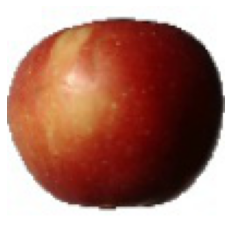

(100, 100, 3)


In [ ]:
#Setting Training & Test dir paths
train_path = '/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training'
test_path = '/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test'

#Displaying the image
img = load_img("/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Apple Braeburn/321_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Printing the shape of the image array 
x = img_to_array(img)
print(x.shape)

**Exploring More Images in the dataset**

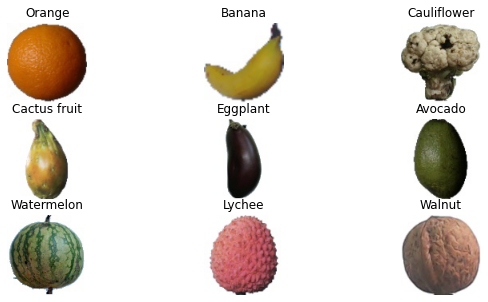

In [ ]:
images = ['Orange', 'Banana', 'Cauliflower', 'Cactus fruit', 'Eggplant', 'Avocado', 'Watermelon','Lychee', 'Walnut']
fig = plt.figure(figsize =(10,5))
for i in range(len(images)):
    ax = fig.add_subplot(3,3,i+1,xticks=[],yticks=[])
    plt.title(images[i])
    plt.axis("off")
    ax.imshow(load_img(train_path +  '/' + images[i] + "/0_100.jpg", target_size=(100,100)))

**Finding the most Frequent fruits**

In [ ]:
#Storing occurences of fruits in a list
fruits = []
fruits_image = []
for i in os.listdir(train_path):
 for image_filename in os.listdir('/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Training'):
        fruits.append(i) 
        fruits_image.append(i + '/' + image_filename)
        
#Finding top 10 frequent Fruits
newData = Counter(fruits)
frequent_fruits = newData.most_common(10)
print("Top 10 frequent Fruits:")
frequent_fruits

Top 10 frequent Fruits:


[('Apple Braeburn', 131),
 ('Apple Crimson Snow', 131),
 ('Apple Golden 1', 131),
 ('Apple Golden 2', 131),
 ('Apple Golden 3', 131),
 ('Apple Granny Smith', 131),
 ('Apple Pink Lady', 131),
 ('Apple Red 1', 131),
 ('Apple Red 2', 131),
 ('Apple Red 3', 131)]

**Finding the Total number of Classes**

In [ ]:
#Finding number of classes
className = glob(train_path + '/*')
number_of_class = len(className)
print(number_of_class)

131


**Creating the Model**

In [ ]:
#creating a model
model = Sequential()
model.add(Conv2D(32,(3,3),input_shape = x.shape))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(32,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Conv2D(64,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(1024))
model.add(Activation("relu"))
model.add(Dropout(0.5))
model.add(Dense(number_of_class)) 
model.add(Activation("softmax"))

#Compiling the model
model.compile(loss = "categorical_crossentropy",
optimizer = "rmsprop",
metrics = ["accuracy"])

#Getting model's summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 98, 98, 32)        896       
                                                                 
 activation_4 (Activation)   (None, 98, 98, 32)        0         
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 47, 47, 32)        9248      
                                                                 
 activation_5 (Activation)   (None, 47, 47, 32)        0         
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                  

**Specifying Epochs and Batch size**

In [ ]:
epochs = 100
batch_size = 64

**Generating Augmented Data**

In [ ]:
#Creating an object of ImageDataGenerator.
train_datagen = ImageDataGenerator(rescale= 1./255,
shear_range = 0.3,
horizontal_flip=True,
zoom_range = 0.3)
test_datagen = ImageDataGenerator(rescale= 1./255)

#Generating batches of Augmented data.
train_generator = train_datagen.flow_from_directory(
directory = train_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")
test_generator = test_datagen.flow_from_directory(
directory = test_path,
target_size= x.shape[:2],
batch_size = batch_size,
color_mode= "rgb",
class_mode= "categorical")

Found 67692 images belonging to 131 classes.
Found 22688 images belonging to 131 classes.


**Fitting the model**


In [ ]:
#Fitting the model
hist = model.fit_generator(
generator = train_generator,
steps_per_epoch = 1600 // batch_size,
epochs=epochs,
validation_data = test_generator,
validation_steps = 800 // batch_size)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/100
25/25 [==============================] - 41s 2s/step - loss: 4.7963 - accuracy: 0.0262 - val_loss: 4.5598 - val_accuracy: 0.0651
Epoch 2/100
25/25 [==============================] - 44s 2s/step - loss: 4.1851 - accuracy: 0.0613 - val_loss: 3.4925 - val_accuracy: 0.1953
Epoch 3/100
25/25 [==============================] - 43s 2s/step - loss: 3.5923 - accuracy: 0.1281 - val_loss: 2.8246 - val_accuracy: 0.2513
Epoch 4/100
25/25 [==============================] - 41s 2s/step - loss: 3.0625 - accuracy: 0.2250 - val_loss: 2.4839 - val_accuracy: 0.3320
Epoch 5/100
25/25 [==============================] - 39s 2s/step - loss: 2.5928 - accuracy: 0.2962 - val_loss: 2.1458 - val_accuracy: 0.3932
Epoch 6/100
25/25 [==============================] - 35s 1s/step - loss: 2.3149 - accuracy: 0.3456 - val_loss: 1.8741 - val_accuracy: 0.4714
Epoch 7/100
25/25 [==============================] - 34s 1s/step - loss: 2.0656 - accuracy: 0.3981 - val_loss: 1.6313 - val_accuracy: 0.5143
Epoch 8/100
2

**Plotting the Loss**

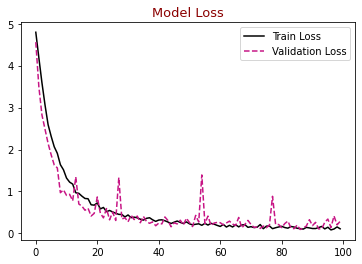

In [ ]:
plt.figure()

plt.plot(hist.history["loss"],label = "Train Loss", color = "black")

plt.plot(hist.history["val_loss"],label = "Validation Loss", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)

plt.title("Model Loss", color = "darkred", size = 13)
plt.legend()
plt.show()

**Plotting the Accuracy**

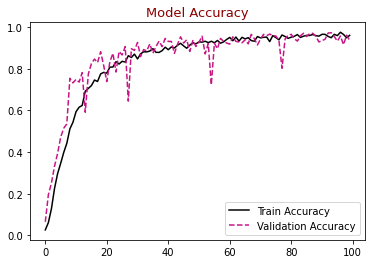

In [ ]:
plt.figure()

plt.plot(hist.history["accuracy"],label = "Train Accuracy", color = "black")

plt.plot(hist.history["val_accuracy"],label = "Validation Accuracy", color = "mediumvioletred", linestyle="dashed",markeredgecolor = "purple", markeredgewidth = 2)

plt.title("Model Accuracy", color = "darkred", size = 13)
plt.legend()
plt.show()

**Taking a sample image for prediction**

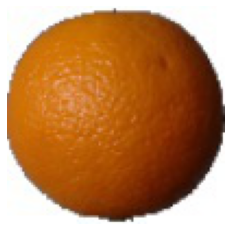

In [ ]:
img = load_img(test_path + "/Orange/310_100.jpg", target_size=(100,100))
plt.imshow(img)
plt.axis("off")
plt.show()

#Loading the image 
def load(filename):
    np_image = Image.open(filename)
    np_image = np.array(np_image).astype('float32')/255
    np_image = np.expand_dims(np_image, axis=0)
    return np_image
image = load('/content/drive/MyDrive/Kaggle/fruits-360_dataset/fruits-360/Test/Orange/310_100.jpg')

**Predicting the Image’s Class**

In [ ]:
prediction = (np.argmax(model.predict(image), axis=-1))
print(prediction)

[113]


**Getting the class name**

In [ ]:
#Printing class dictionary
print(test_generator.class_indices)

{'Apple Braeburn': 0, 'Apple Crimson Snow': 1, 'Apple Golden 1': 2, 'Apple Golden 2': 3, 'Apple Golden 3': 4, 'Apple Granny Smith': 5, 'Apple Pink Lady': 6, 'Apple Red 1': 7, 'Apple Red 2': 8, 'Apple Red 3': 9, 'Apple Red Delicious': 10, 'Apple Red Yellow 1': 11, 'Apple Red Yellow 2': 12, 'Apricot': 13, 'Avocado': 14, 'Avocado ripe': 15, 'Banana': 16, 'Banana Lady Finger': 17, 'Banana Red': 18, 'Beetroot': 19, 'Blueberry': 20, 'Cactus fruit': 21, 'Cantaloupe 1': 22, 'Cantaloupe 2': 23, 'Carambula': 24, 'Cauliflower': 25, 'Cherry 1': 26, 'Cherry 2': 27, 'Cherry Rainier': 28, 'Cherry Wax Black': 29, 'Cherry Wax Red': 30, 'Cherry Wax Yellow': 31, 'Chestnut': 32, 'Clementine': 33, 'Cocos': 34, 'Corn': 35, 'Corn Husk': 36, 'Cucumber Ripe': 37, 'Cucumber Ripe 2': 38, 'Dates': 39, 'Eggplant': 40, 'Fig': 41, 'Ginger Root': 42, 'Granadilla': 43, 'Grape Blue': 44, 'Grape Pink': 45, 'Grape White': 46, 'Grape White 2': 47, 'Grape White 3': 48, 'Grape White 4': 49, 'Grapefruit Pink': 50, 'Grapefrui

**Conclusion:**
Hence, we trained a simple Convolutional Neural Network(CNN) to classify fruit images.After training the model we got 96% accuracy. 